###  숫자 인식 

In [18]:
import os
import cv2

In [54]:
TRAIN_FOLDER = "../images/MNIST/trainingSet/"
TEST_FOLDER = "../images/MNIST/testSet/"

In [6]:
folderlist = os.listdir(TRAIN_FOLDER)

In [7]:
IMG_SIZE = 28

In [51]:
train_images = []
train_labels = []

###  폴더 하나씩 이동

In [31]:
import matplotlib.pylab as plt
%matplotlib inline

In [32]:
import pandas as pd

In [52]:
for i in range (0, len(folderlist)):
        path = os.path.join( TRAIN_FOLDER,  folderlist[i])
        imgList = os.listdir(path)
        for j in range(0, len(imgList)):
            try :
                inputimgPath = os.path.join(path, imgList[j])
                gray = cv2.imread(inputimgPath, cv2.IMREAD_GRAYSCALE)
                grayimg = cv2.resize(gray, (IMG_SIZE,IMG_SIZE))
                train_images.append(grayimg)
                train_labels.append(i)
            except Exception as e:
                print(inputimgPath, e)
                pass

../images/MNIST/trainingSet/0_zero\img_0.txt OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [57]:
from numpy import array
import numpy as np

In [53]:
print(np.array(train_images).shape)
print(np.array(train_labels).shape)

(42000, 28, 28)
(42000,)


In [55]:
TEST_DIR = '../images/mnist/testSet/'
test_folder_list = os.listdir(TEST_DIR)
test_folder_list

test_images=[]
test_labels=[]
for index in range(0, len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        test_images.append(new_img)
        test_labels.append(index)

In [58]:
train_images = array(train_images)
train_labels = array(train_labels)
test_images = array(test_images)
test_labels = array(test_labels)

In [59]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (42000, 28, 28) (42000,)
Testing data shape :  (200, 28, 28) (200,)


In [60]:
 
# 훈련데이터의 답지분류 범위 정의
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [124]:
train_data = train_images.reshape(len(train_images), IMG_SIZE,IMG_SIZE)
test_data = test_images.reshape(len(test_images), IMG_SIZE,IMG_SIZE)

In [125]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

train_data /= 255
test_data /= 255

In [126]:
train_data[0]

array([[0.01176471, 0.        , 0.        , 0.01176471, 0.02745098,
        0.01176471, 0.        , 0.01176471, 0.        , 0.04313725,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.01176471, 0.03137255, 0.        , 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.01960784, 0.        ,
        0.04705882, 0.        , 0.0627451 , 0.        , 0.        ,
        0.01568627, 0.        , 0.00784314, 0.03137255, 0.01176471,
        0.        , 0.01568627, 0.03137255, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.00392157, 0.00784314, 0.00392157, 0.04705882,
        0.        , 0.03137255, 0.        , 0.        , 0.02352941,
        0.        , 0.0431

In [127]:
import keras

In [128]:
import os
import cv2
import keras
# 케라스 모델 생성 라이브러리
from keras import models
# 레이어 생성 라이브러리 (Dense: 입출력 연결)
from keras import layers
# 케라스 샘플데이터[mnist] 라이브러리 불러오기
from keras.datasets import mnist
# numpy 라이브러리
import numpy as np
from numpy import array
# 케라스 카테고리 라이브러리
from keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
from keras.utils import to_categorical

In [130]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)

In [131]:
np.argmax(train_labels_one_hot[41999])

9

In [132]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[10000])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[10000])

Original label 0 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [133]:
from numpy import argmax

In [134]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [135]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense

In [136]:
# 입력데이터 형태
modelDim = train_data[0].shape
modelDim

(28, 28)

###  모델 지정

In [181]:
model = Sequential()

In [182]:
model.add(Flatten(input_shape=modelDim))

In [183]:
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [184]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [185]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [186]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

In [187]:
import warnings

In [188]:
warnings.filterwarnings(action="ignore")

In [189]:
from datetime import datetime

In [190]:
currentdate = datetime.now().strftime("%Y_%m_%d_%H_%M")
currentdate

'2019_10_07_16_06'

In [191]:
callback_list = [
    EarlyStopping(monitor="val_loss", patience=10), 
    TensorBoard(log_dir="./logs_{}".format(currentdate),
            write_images=True, write_graph=True),
    ModelCheckpoint("./model_weights.h5", monitor="val_loss", verbose=1, save_best_only=True)
    
]

In [193]:
#model.fit(x= train_images, y= train_labels_one_hot, batch_size=32,validation_split=0.2, epochs=4)
model.fit(x= train_data, y= train_labels_one_hot, batch_size=21000, validation_data=(test_data,test_labels_one_hot), epochs=5
         ,callbacks = callback_list
         )

Train on 42000 samples, validate on 200 samples
Epoch 1/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.9910 - accuracy: 0.3818 - val_loss: 1.9350 - val_accuracy: 0.4100

Epoch 00001: val_loss improved from 1.98431 to 1.93503, saving model to ./model_weights.h5
Epoch 2/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.9479 - accuracy: 0.4062 - val_loss: 1.8874 - val_accuracy: 0.4400

Epoch 00002: val_loss improved from 1.93503 to 1.88738, saving model to ./model_weights.h5
Epoch 3/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.9060 - accuracy: 0.4215 - val_loss: 1.8404 - val_accuracy: 0.4500

Epoch 00003: val_loss improved from 1.88738 to 1.84043, saving model to ./model_weights.h5
Epoch 4/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.8645 - accuracy: 0.4357 - val_loss: 1.7930 - val_accuracy: 0.4700

Epoch 00004: val_loss improved from 1.84043 to 1.79301, saving model to ./model_weights.h5
Epoc

In [207]:
# 모델 저장
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("classlogic.h5")

In [208]:
# 모델 불러오기
from keras.models import model_from_json 
json_file = open("model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("classlogic.h5") 

In [209]:
# Sequatial 방싱 케라스모델
# 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
# 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)
loaded_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [210]:
# 모델을 32개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
history = loaded_model.fit(train_data, train_labels_one_hot, 
                    batch_size=42000,
                    epochs=5,
                    shuffle=True,
                    callbacks = callback_list)

Epoch 1/5
42000/42000 [==============================] - 0s 8us/step - loss: 1.7946 - accuracy: 0.4630
Epoch 2/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.7741 - accuracy: 0.4744
Epoch 3/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.7542 - accuracy: 0.4838
Epoch 4/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.7349 - accuracy: 0.4914
Epoch 5/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.7160 - accuracy: 0.4986


In [238]:
for i in range(5):

    # 모델 저장
    model_json = loaded_model.to_json()

    with open("model_re.json", "w") as json_file:
        json_file.write(model_json)

    loaded_model.save_weights("classlogicre.h5")

    # 모델 불러오기
    from keras.models import model_from_json 
    json_file = open("model_re.json", "r") 
    loaded_model_json = json_file.read() 
    json_file.close() 

    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("classlogicre.h5") 

    # Sequatial 방싱 케라스모델
    # 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
    # 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)
    loaded_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # 모델을 32개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
    history = loaded_model.fit(train_data, train_labels_one_hot, 
                        batch_size=32,
                        epochs=5,
                        shuffle=True,
                        callbacks = callback_list)

Epoch 1/5
42000/42000 [==============================] - 2s 51us/step - loss: 0.4804 - accuracy: 0.8626
Epoch 2/5
42000/42000 [==============================] - 2s 48us/step - loss: 0.3410 - accuracy: 0.9026
Epoch 3/5
42000/42000 [==============================] - 2s 49us/step - loss: 0.3078 - accuracy: 0.9124
Epoch 4/5
42000/42000 [==============================] - 2s 47us/step - loss: 0.2922 - accuracy: 0.9171
Epoch 5/5
42000/42000 [==============================] - 2s 46us/step - loss: 0.2815 - accuracy: 0.9198 0s - loss: 0.281
Epoch 1/5
42000/42000 [==============================] - 2s 54us/step - loss: 0.2727 - accuracy: 0.9206
Epoch 2/5
42000/42000 [==============================] - 2s 48us/step - loss: 0.2653 - accuracy: 0.9245
Epoch 3/5
42000/42000 [==============================] - 2s 47us/step - loss: 0.2589 - accuracy: 0.9261
Epoch 4/5
42000/42000 [==============================] - 2s 47us/step - loss: 0.2531 - accuracy: 0.9266
Epoch 5/5
42000/42000 [========================

In [233]:
# 모델 불러오기 for문으로 합침
from keras.models import model_from_json 
json_file = open("model_re.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("classlogicre.h5") 

In [234]:
# Sequatial 방싱 케라스모델
# 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
# 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)
# 위로 합침
loaded_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [235]:
# 모델을 32개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련 위로 합침
history = loaded_model.fit(train_data, train_labels_one_hot, 
                    batch_size=42000,
                    epochs=5,
                    shuffle=True,
                    callbacks = callback_list)

Epoch 1/5
42000/42000 [==============================] - 0s 9us/step - loss: 1.3895 - accuracy: 0.6365
Epoch 2/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.3765 - accuracy: 0.6416
Epoch 3/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.3637 - accuracy: 0.6476
Epoch 4/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.3522 - accuracy: 0.6523
Epoch 5/5
42000/42000 [==============================] - 0s 6us/step - loss: 1.3397 - accuracy: 0.6570


In [197]:
loss, accuracy = model.evaluate(x=test_data, y= test_labels_one_hot)
print(loss,accuracy)

200/200 [==============================] - 0s 35us/step
1.7483689928054809 0.4950000047683716


1.7483689928054809 0.4950000047683716


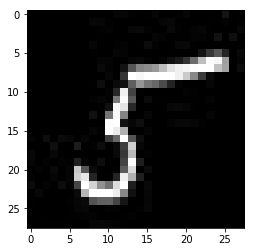

In [174]:
prd_images = []
imgpah="../images/mnist/testSet/5/img_24.jpg"
img = cv2.imread(imgpah, cv2.IMREAD_GRAYSCALE)
prd_images.append(img)
prd_images=array(prd_images)

plt.imshow(img, cmap="gray")

In [175]:
test_data2 = prd_images.reshape(len(prd_images) , IMG_SIZE, IMG_SIZE)
test_data2 = test_data2.astype('float')
test_data2 /= 255

In [178]:
# Predict the most likely class
label_pred = model.predict(test_data2[[0],:])

In [179]:
label_pred

array([[9.6001988e-03, 3.3788248e-07, 1.2054456e-03, 2.7370220e-04,
        9.5070479e-04, 9.7909236e-01, 5.9168129e-03, 2.0565747e-06,
        1.6172496e-03, 1.3411331e-03]], dtype=float32)

In [180]:
np.argmax(label_pred)

5

In [35]:
inputimg = pd.DataFrame(grayimg)

In [37]:
inputimg.to_csv("D:/train.csv")

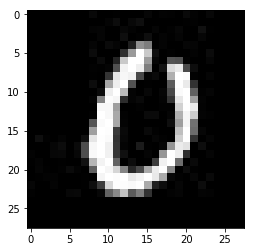

In [34]:
plt.imshow(grayimg, cmap = "gray")